In [1]:
import pandas as pd
import http.client
import json
from config import IMDB_API_KEY 

In [2]:
#HTTP bağlantısı oluşutrma
conn = http.client.HTTPSConnection("imdb-top-100-movies.p.rapidapi.com")

In [3]:
#HTPP isteğinin başlıklarını belirleme
#RapidAPI üzerinden IMDb Top 100 filmler API'sine yönelik istek.
headers = {
    'X-RapidAPI-Key': IMDB_API_KEY,
    'X-RapidAPI-Host': "imdb-top-100-movies.p.rapidapi.com"
}

In [4]:
# İlk isteği gönder
conn.request("GET","/", headers=headers)

# Yanıtı al
response = conn.getresponse()


In [5]:
#HTTP yanıtını okuma ve Unicode formatına çevirme
data = response.read().decode("utf-8")

In [6]:
#JSON formatına çevirme
imdb_top_100 = json.loads(data)

In [7]:
imdb_top_100 #gelen veri

[{'rank': 1,
  'title': 'The Shawshank Redemption',
  'description': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
  'image': 'https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX380_CR0,1,380,562_.jpg',
  'big_image': 'https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@',
  'genre': ['Drama'],
  'thumbnail': 'https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg',
  'rating': '9.3',
  'id': 'top1',
  'year': 1994,
  'imdbid': 'tt0111161',
  'imdb_link': 'https://www.imdb.com/title/tt0111161'},
 {'rank': 2,
  'title': 'The Godfather',
  'description': 'The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluct

In [8]:
#sütun isimleri
print(imdb_top_100[0].keys())

dict_keys(['rank', 'title', 'description', 'image', 'big_image', 'genre', 'thumbnail', 'rating', 'id', 'year', 'imdbid', 'imdb_link'])


In [36]:
#for döngüsü ile tüm verileri görme
for i in range(len(imdb_top_100)):
    print(imdb_top_100[i]['id'])
    print(imdb_top_100[i]['title'])
    print(imdb_top_100[i]['description'])
    print(imdb_top_100[i]['genre'])
    print(imdb_top_100[i]['rating'])
    print(imdb_top_100[i]['year'])

top1
The Shawshank Redemption
Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.
['Drama']
9.3
1994
top2
The Godfather
The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.
['Crime', 'Drama']
9.2
1972
top3
The Dark Knight
When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
['Action', 'Crime', 'Drama']
9.0
2008
top4
The Godfather Part II
The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.
['Crime', 'Drama']
9.0
1974
top5
12 Angry Men
The jury in a New York City murder trial is frustrated by a single member whose skeptical caution forces them to more carefully consider the evidenc

In [37]:
# Boş bir liste oluştur
data_list = []
for i in range(len(imdb_top_100)):
    movie_data = {
        'id': imdb_top_100[i]['id'],
        'title': imdb_top_100[i]['title'],
        'description': imdb_top_100[i]['description'],
        'genre': imdb_top_100[i]['genre'],
        'rating': imdb_top_100[i]['rating'],
        'year': imdb_top_100[i]['year']
    }
    data_list.append(movie_data)

# Liste üzerinden bir DataFrame oluştur
df = pd.DataFrame(data_list)

In [38]:
df

,id,title,description,genre,rating,year
0,top1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,[Drama],9.3,1994
1,top2,The Godfather,The aging patriarch of an organized crime dyna...,"[Crime, Drama]",9.2,1972
2,top3,The Dark Knight,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,2008
3,top4,The Godfather Part II,The early life and career of Vito Corleone in ...,"[Crime, Drama]",9.0,1974
4,top5,12 Angry Men,The jury in a New York City murder trial is fr...,"[Crime, Drama]",9.0,1957
...,...,...,...,...,...,...
95,top96,Reservoir Dogs,When a simple jewelry heist goes horribly wron...,"[Crime, Thriller]",8.3,1992
96,top97,Ikiru,A bureaucrat tries to find meaning in his life...,[Drama],8.3,1952
97,top98,Lawrence of Arabia,"The story of T.E. Lawrence, the English office...","[Adventure, Biography, Drama]",8.3,1962
98,top99,Citizen Kane,Following the death of publishing tycoon Charl...,"[Drama, Mystery]",8.3,1941


# DataFrame'i Analiz Etme

In [39]:
#satır, sütun sayısı
df.shape

(100, 6)

In [40]:
df.info()#data hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           100 non-null    object
 1   title        100 non-null    object
 2   description  100 non-null    object
 3   genre        100 non-null    object
 4   rating       100 non-null    object
 5   year         100 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [41]:
df.isnull().sum()#null değerlerin toplamı

id             0
title          0
description    0
genre          0
rating         0
year           0
dtype: int64

In [42]:
#id sütununu artan şekilde güncelleme
df['id'] = range(1, 101)

In [52]:
#güncelleme sonra ilk 5 satır
df.head()

,id,title,description,genre,rating,year
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,[Drama],9.3,1994
1,2,The Godfather,The aging patriarch of an organized crime dyna...,"[Crime, Drama]",9.2,1972
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,2008
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"[Crime, Drama]",9.0,1974
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"[Crime, Drama]",9.0,1957


In [53]:
def column_exploder(dataframe, field):
    columns = list(dataframe.columns)
    for index, i in enumerate(dataframe[field]):
        for j in i:
            slice_index = j.find('(')
            if slice_index != -1:
                j = j[:slice_index]
            if j not in columns:
                new_column_df = pd.DataFrame({f'{j} [{field}]':[0 for i in range(len(dataframe))]})
                dataframe = pd.concat([dataframe, new_column_df], axis=1)
                dataframe[f'{j} [{field}]'][index] = 1
                columns.append(j)
            else:
                dataframe[f'{j} [{field}]'][index] = 1
                
    return dataframe


In [54]:
# 'Genres' sütununu genişlet
df_expanded = column_exploder(df, 'genre')

C:\Users\tubaa\AppData\Local\Temp\ipykernel_1992\1068952970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'{j} [{field}]'][index] = 1
C:\Users\tubaa\AppData\Local\Temp\ipykernel_1992\1068952970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'{j} [{field}]'][index] = 1
C:\Users\tubaa\AppData\Local\Temp\ipykernel_1992\1068952970.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'{j} [{fiel

In [55]:
df_expanded

,id,title,description,genre,rating,year,Drama [genre],Crime [genre],Action [genre],Biography [genre],...,Animation [genre],Mystery [genre],Family [genre],Thriller [genre],War [genre],Comedy [genre],Music [genre],Horror [genre],Film-Noir [genre],Musical [genre]
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,[Drama],9.3,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,The Godfather,The aging patriarch of an organized crime dyna...,"[Crime, Drama]",9.2,1972,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,2008,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"[Crime, Drama]",9.0,1974,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"[Crime, Drama]",9.0,1957,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Reservoir Dogs,When a simple jewelry heist goes horribly wron...,"[Crime, Thriller]",8.3,1992,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
96,97,Ikiru,A bureaucrat tries to find meaning in his life...,[Drama],8.3,1952,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,98,Lawrence of Arabia,"The story of T.E. Lawrence, the English office...","[Adventure, Biography, Drama]",8.3,1962,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
98,99,Citizen Kane,Following the death of publishing tycoon Charl...,"[Drama, Mystery]",8.3,1941,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Görselleştirme

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

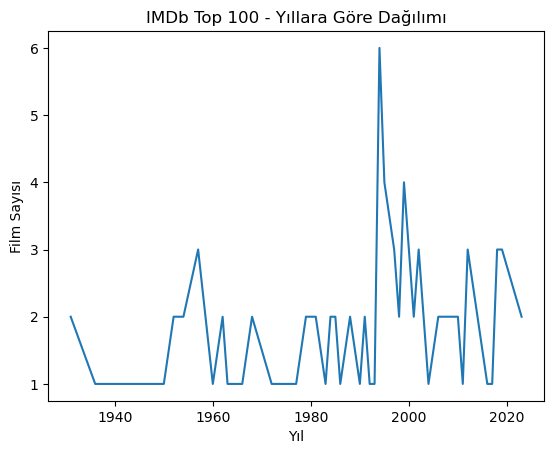

In [22]:

# Yıl dağılımını görselleştirme
yil_dagilimi = df['year'].value_counts()

sns.lineplot(x=yil_dagilimi.index, y=yil_dagilimi.values)
plt.xlabel('Yıl')
plt.ylabel('Film Sayısı')
plt.title('IMDb Top 100 - Yıllara Göre Dağılımı')
plt.show()